In [1]:
# importing all the libraries we need
import numpy as np
import matplotlib.pyplot as plt
import os
import time
import random
import pandas as pd
import torch
from torch import nn, cuda, optim
from torchvision import models,transforms,datasets
from torch.utils.data import DataLoader,random_split
from PIL import Image
import seaborn as sns

In [2]:
# Knowing the data 
data_dir = './160 BIRDS/'
classes = []
img_per_class = []
for folder in os.listdir(data_dir+'consolidated'):
    classes.append(folder)
    img_per_class.append(len(os.listdir(f'{data_dir}consolidated/{folder}')))
num_classes = len(classes)
df = pd.DataFrame({'Classes':classes, 'Examples':img_per_class})
df

,Classes,Examples
0,ALBATROSS,110
1,ALEXANDRINE PARAKEET,176
2,AMERICAN AVOCET,190
3,AMERICAN BITTERN,180
4,AMERICAN COOT,168
5,AMERICAN GOLDFINCH,144
6,AMERICAN KESTREL,141
7,AMERICAN PIPIT,189
8,AMERICAN REDSTART,149
9,ANHINGA,157


In [ ]:
# i didn't run due to its size 
samples = []
num_per_class = 1
for folder in range(num_per_class):
    for species in os.listdir(data_dir+'consolidated'):
        samples.append(os.path.join(f'{data_dir}consolidated/{species}',
                                    random.choice(os.listdir(f'{data_dir}consolidated/{species}/'))))
# plotting some images to know the data        
plt.figure(figsize=(20,100))
for n in range(len(samples)):
    plt.subplot(32,5,n+1)
    plt.imshow(Image.open(samples[n]))
    plt.title(classes[n])
    plt.axis('off')

In [4]:
# loading the model architecture
model = models.resnet50(pretrained=True)

# freezing all the parameters from training 
for param in model.parameters():
    param.require_grad = False
    
# adding a fc layer with relu activation and a dropout layer to prevent overfitting then output layer with num of classes
model.fc = nn.Sequential(nn.Linear(model.fc.in_features,1024),
                         nn.ReLU(),
                         nn.Dropout(0.3),
                         nn.Linear(1024,num_classes))
model

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): Bottleneck(
      (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace)
      (downsample): Sequential(
        (0): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=F

In [5]:
# class Net(nn.Module):
#     def __init__(self):
#         super(Net, self).__init__()
#         self.conv1 = nn.Conv2d(3, 32, 5, padding=2)
#         self.bn1 = nn.BatchNorm2d(32)
#         self.pool1 = nn.MaxPool2d(2,2)
#         self.conv2 = nn.Conv2d(32,64,5, padding=2)
#         self.bn2 = nn.BatchNorm2d(64)
#         self.pool2 = nn.MaxPool2d(2,2)
#         self.conv3 = nn.Conv2d(64,128,5, padding=2)
#         self.bn3 = nn.BatchNorm2d(128)
#         self.pool3 = nn.MaxPool2d(2,2)
#         self.dropout1 = nn.Dropout(0.4)
#         self.fc1 = nn.Linear(28*28*128,1024)
#         self.dropout2 = nn.Dropout(0.4)
#         self.fc2 = nn.Linear(1024,num_classes)
        
#     def forward(self,x):
#         x = self.pool1(nn.functional.relu(self.bn1(self.conv1(x))))
#         x = self.pool2(nn.functional.relu(self.bn2(self.conv2(x))))
#         x = self.pool3(nn.functional.relu(self.bn3(self.conv3(x))))
#         x = self.dropout1(x)
#         x = x.view(x.size(0),-1)
#         x = nn.functional.relu(self.fc1(x))
#         x = self.dropout2(x)
#         x = self.fc2(x)
#         return x
        
# model = Net()        

In [6]:
device = torch.device('cuda:0' if cuda.is_available() else 'cpu')
model.to(device)
print(device)

cuda:0


In [7]:
# doing data augmentation 
train_transform = transforms.Compose([transforms.RandomRotation(45),transforms.RandomHorizontalFlip(),
                                      transforms.RandomVerticalFlip(),transforms.ToTensor(),
                                      transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])])
val_transform = transforms.Compose([transforms.RandomRotation(45),transforms.RandomHorizontalFlip(),
                                    transforms.RandomVerticalFlip(),transforms.ToTensor(),
                                    transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])])
test_transform = transforms.Compose([transforms.ToTensor(),
                                    transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])])

In [8]:
# splitting the data into train/validation/test sets
data = datasets.ImageFolder(data_dir+'consolidated')
train_size = int(len(data)*0.9)
val_size = int((len(data)-train_size)*0.7)
test_size = int(len(data)-train_size-val_size)
train_data,val_data,test_data = random_split(data,[train_size,val_size,test_size])
print(f'train size: {len(train_data)}\nval size: {len(val_data)}\ntest size: {len(test_data)}')

train size: 20810
val size: 1619
test size: 694


In [9]:
train_data.dataset.transform = train_transform
val_data.dataset.transform = val_transform
test_data.dataset.transform = test_transform
batch_size = 16
train_loader = DataLoader(train_data,batch_size=batch_size,shuffle=True)
val_loader = DataLoader(val_data,batch_size=batch_size,shuffle=True)
test_loader = DataLoader(test_data,batch_size=batch_size,shuffle=False)

In [10]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(),lr=0.0001)

In [11]:
def fit(model,criterion,optimizer,num_epochs=10):
    start = time.time()
    best_model = model.state_dict()
    best_acc = 0.0
    train_loss_over_time = []
    val_loss_over_time = []
    train_acc_over_time = []
    val_acc_over_time = []
    
    # each epoch has a training and validation phase
    for epoch in range(num_epochs):
        print(f'{epoch+1}/{num_epochs} epoch')
        
        for phase in ['train','val']:
            
            if phase == 'train':
                data_loader = train_loader
                model.train()                    # set the model to train mode
            else:
                data_loader = val_loader
                model.eval()                    # set the model to evaluate mode
                
            running_loss = 0.0
            running_corrects = 0.0
            
            # iterate over the data
            for inputs,labels in data_loader:
                inputs = inputs.to(device)
                labels = labels.to(device)
                
                # zero the parameter gradients
                optimizer.zero_grad()
                
                # forward
                with torch.set_grad_enabled(phase == 'train'):
                    outputs = model(inputs)
                    _,pred = torch.max(outputs,dim=1)
                    loss = criterion(outputs,labels)
                    
                    # backward + optimize only if in training phase
                    if phase == 'train':
                        loss.backward()
                        optimizer.step()
                
                # calculating the loss and accuracy
                running_loss += loss.item() * inputs.size(0)
                running_corrects += torch.sum(pred == labels.data)
                
            if phase == 'train':
                epoch_loss = running_loss/len(train_data)
                train_loss_over_time.append(epoch_loss)
                epoch_acc = running_corrects.double()/len(train_data)
                train_acc_over_time.append(epoch_acc)
            else:
                epoch_loss = running_loss/len(val_data)
                val_loss_over_time.append(epoch_loss)
                epoch_acc = running_corrects.double()/len(val_data)
                val_acc_over_time.append(epoch_acc)
                
            print(f'{phase} loss: {epoch_loss:.3f}, acc: {epoch_acc:.3f}')
            
            if phase == 'val' and epoch_acc > best_acc:
                best_acc = epoch_acc
                best_model = model.state_dict()
                
        print('-'*60)
    
    total_time = (time.time() - start)/60
    print(f'training complete in: {total_time:.3f} min\nbest accuracy: {best_acc:.3f}')
    # load best model weights
    model.load_state_dict(best_model)
    loss = {'train':train_loss_over_time, 'val':val_loss_over_time}
    acc = {'train':train_acc_over_time, 'val':val_acc_over_time}
    return model,loss,acc

In [12]:
# training the model
epochs = 5
history,loss,acc = fit(model,criterion,optimizer,num_epochs=epochs)

1/5 epoch
train loss: 1.664, acc: 0.630
val loss: 0.405, acc: 0.891
------------------------------------------------------------
2/5 epoch
train loss: 0.353, acc: 0.907
val loss: 0.257, acc: 0.927
------------------------------------------------------------
3/5 epoch
train loss: 0.216, acc: 0.939
val loss: 0.318, acc: 0.914
------------------------------------------------------------
4/5 epoch
train loss: 0.171, acc: 0.952
val loss: 0.287, acc: 0.933
------------------------------------------------------------
5/5 epoch
train loss: 0.131, acc: 0.962
val loss: 0.346, acc: 0.910
------------------------------------------------------------
training complete in: 37.851 min
best accuracy: 0.933


Text(0.5, 1.0, 'Accuracy')

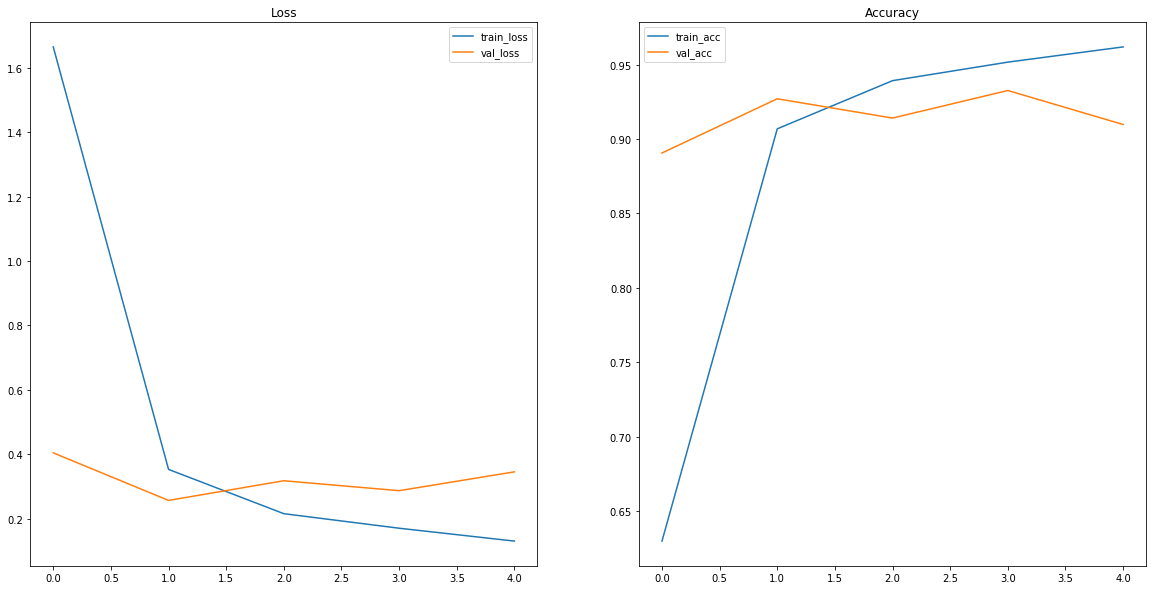

In [13]:
# plotting the loss and accuracy curve for each phase
train_loss = loss['train']
val_loss = loss['val']
train_acc = acc['train']
val_acc = acc['val']

epochs_range = range(epochs)

plt.figure(figsize=(20,10))

plt.subplot(1,2,1)
plt.plot(epochs_range,train_loss,label='train_loss')
plt.plot(epochs_range,val_loss,label='val_loss')
plt.legend(loc=0)
plt.title('Loss')

plt.subplot(1,2,2)
plt.plot(epochs_range,train_acc,label='train_acc')
plt.plot(epochs_range,val_acc,label='val_acc')
plt.legend(loc=0)
plt.title('Accuracy')

In [14]:
# testing how good the model is
def evaluate(model,criterion):
    model.eval()       # setting the model to evaluate mode
    test_loss = 0.0
    test_acc = 0.0
    preds = []
    labels_list = []
    
    for inputs,labels in test_loader:
        
        inputs = inputs.to(device)
        labels = labels.to(device)
        
        # predicting
        with torch.no_grad():
            outputs = model(inputs)
            loss = criterion(outputs,labels)
            _,pred = torch.max(outputs,dim=1)
            preds.append(pred)
            labels_list.append(labels)
        
        # calculating the loss and accuracy 
        test_loss += loss.item()*inputs.size(0)        
        correct = pred.eq(labels.data.view_as(pred))
        accuracy = torch.mean(correct.type(torch.FloatTensor))
        test_acc += accuracy.item() * inputs.size(0)
    
    # avreging the loss and accuracy
    test_loss = test_loss/len(test_loader.dataset)
    test_acc = test_acc / len(test_loader.dataset)
        
    print("test loss: {:.4f}  test acc: {:.4f}".format(test_loss,test_acc))
    return preds,labels_list

In [15]:
# testing the model
predictions,labels = evaluate(model,criterion)

test loss: 0.2504  test acc: 0.9352


In [16]:
# the model's name
model_name = 'model_resnet50.pt'
# saving the best trained model
torch.save(model.state_dict(),model_name)

In [17]:
# loading the model to evaluate
model.load_state_dict(torch.load('model_resnet50.pt'))

In [18]:
model.cuda()

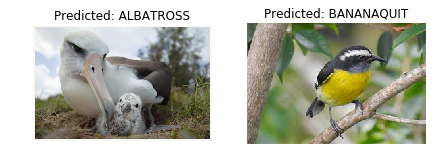

In [19]:
# predicting on image from the web
from urllib import request
img_urls = ['https://i2.wp.com/www.casablanca-nuernberg.de/wp-content/uploads/2018/09/albatross.jpg?w=660&ssl=1','https://encrypted-tbn0.gstatic.com/images?q=tbn%3AANd9GcS2v3aWxgzOb-SWhtQRCk0KdAb9iY_RNe8UcETwBFhyafDW6oFg']
imgs = []
predictions = []
for img_url in img_urls:
    img = Image.open(request.urlopen(img_url))
    imgs.append(img)
    img_transform = transforms.Compose([transforms.Resize((224,224)),transforms.ToTensor(),
                                        transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])])
    img = img_transform(img)
    img = img.unsqueeze(0)
    img = img.to(device)
    model.eval()
    outputs = model(img)
    _,pred = torch.max(outputs,dim=1)
    predictions.append(classes[pred])
    
plt.figure(figsize=(30,30))
for n in range(len(imgs)):
    plt.subplot(8,8,n+1)
    plt.imshow(imgs[n])
    plt.title("Predicted: "+predictions[n])
    plt.axis('off')
    